# Yahoo Finance Data

The requested range must be within the last 60 days, if interval="5m", 30 days if interval="1m" <br>
Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo] <br>
Only 7 days worth of 1m granularity data are allowed to be fetched per request.<br>

In [2]:
import yfinance as yf
import mplfinance as mpf
import datetime as dt

print("Download data from yahoo finance")
print("Interval: 5m")
symbol = input("Enter the stock ticker (eg.RELIANCE.NS): ")
print(symbol)

print("MENU")
print("1. Download data for last 60 days")
print("2. Download data from the start date specified")
option = input("Option: ")

Download data from yahoo finance
Interval: 5m
RELIANCE.NS
MENU
1. Download data for last 60 days
2. Download data from the start date specified


In [3]:

if option == "1":
    start_date = dt.datetime.today() - dt.timedelta(59)
    end_date = dt.datetime.today()

elif option == "2":
    user_input_start_date = input("Enter the start date (YYYY-MM-DD): ")

    start_date = dt.datetime.strptime(user_input_start_date, '%Y-%m-%d')
    end_date = start_date + dt.timedelta(59)

print("Start date: ", start_date.date())
print("End date: ", end_date.date())

Start date:  2022-09-07
End date:  2022-11-05


In [4]:
df = yf.download(tickers=symbol, start=start_date, end=end_date, interval="5m")
print(f"Number of candles: {df.size}")
df

[*********************100%***********************]  1 of 1 completed
Number of candles: 17544


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-09-08 09:15:00+05:30,2589.149902,2598.000000,2588.300049,2590.300049,2590.300049,0
2022-09-08 09:20:00+05:30,2589.300049,2592.949951,2587.000000,2592.699951,2592.699951,84109
2022-09-08 09:25:00+05:30,2592.300049,2594.949951,2588.050049,2592.000000,2592.000000,62814
2022-09-08 09:30:00+05:30,2592.000000,2593.000000,2589.850098,2590.500000,2590.500000,34769
2022-09-08 09:35:00+05:30,2590.050049,2591.750000,2587.050049,2588.000000,2588.000000,48808
...,...,...,...,...,...,...
2022-11-04 15:10:00+05:30,2594.250000,2595.800049,2590.550049,2591.199951,2591.199951,105929
2022-11-04 15:15:00+05:30,2591.500000,2593.500000,2590.050049,2591.000000,2591.000000,146038
2022-11-04 15:20:00+05:30,2591.100098,2594.000000,2589.800049,2593.500000,2593.500000,139203


In [5]:
# saving the data to a csv file
df.to_csv(f"{symbol}-{start_date.date()}-to-{end_date.date()}.csv")

/usr/local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/usr/local/lib/python3.10/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


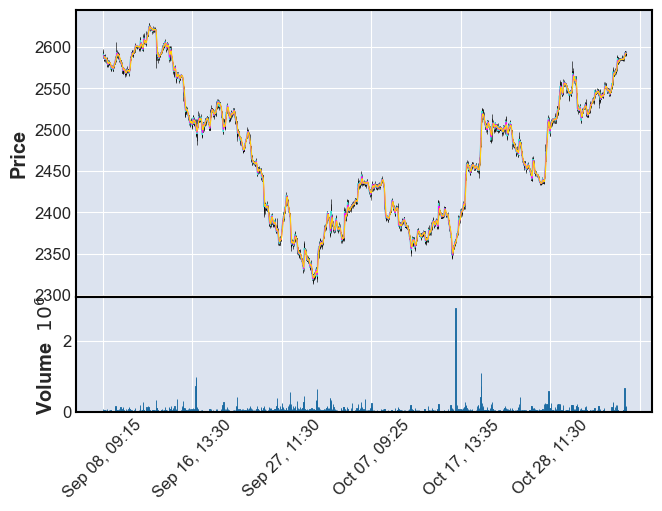

In [6]:
# plot the data
mpf.plot(df,type='candle',mav=(3,6,9),volume=True)